In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

from inference import *

In [2]:
encoder = Encoder().to(device)
importance = Importance().to(device)
decoder = Decoder().to(device)
probabilityModel = ProbabilityModel().to(device)
vgg16 = VGG16().to(device)

# load weights
arch = torch.load('/mnt/HDD3/weights_all/b4')
encoder.load_state_dict(arch['encoder'])
importance.load_state_dict(arch['importance'])
decoder.load_state_dict(arch['decoder'])
probabilityModel.load_state_dict(arch['probabilityModel'])

# kmeans on decoder bias
dec_bias = []
dec_bias.append(list(decoder.conv1[0].bias.detach().cpu().numpy()) +
                    list(decoder.conv2[0].bias.detach().cpu().numpy()) +
                    list(decoder.conv3.bias.detach().cpu().numpy()))

dec_bias_raw, d1, d2, d3 = arch['dec_bias_raw'], arch['d1'], arch['d2'], arch['d3']
# kmeans = KMeans(n_clusters=256, random_state=0).fit(dec_bias_raw)
# dec_bias_center = torch.nn.Parameter(torch.tensor(kmeans.cluster_centers_))

kmeans = KMeans(n_clusters=255, random_state=0).fit(dec_bias_raw)
dec_bias.extend(kmeans.cluster_centers_.tolist())
dec_bias = np.array(dec_bias)

# quantizer
round_straightthrough = RoundStraightThrough().apply

# losses
L1_loss = nn.L1Loss(reduction='sum')
MSE_loss = nn.MSELoss(reduction='sum')

jpeg_ai = JPEG_AI('jpeg_ai', mode='test', n_way=1, k_shot=1, k_query=1, batchsz=50, resize=256)

shuffle DB :test, b:50, 1-way, 1-shot, 1-query, resize:256


In [3]:
b = 4

/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:2539: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")
/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


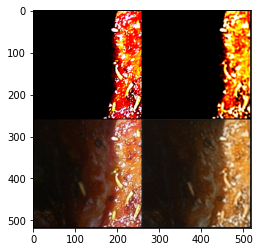

MS-SSIM loss: 0.114 | MSE: 17231.969 | perceptual loss: 1818944.875 | bpp: 2.991 |  PSNR: 23.509


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


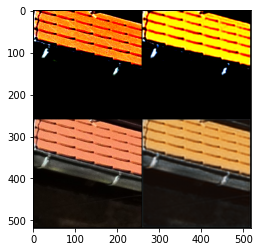

MS-SSIM loss: 0.096 | MSE: 15132.487 | perceptual loss: 1592812.125 | bpp: 19.230 |  PSNR: 24.072


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


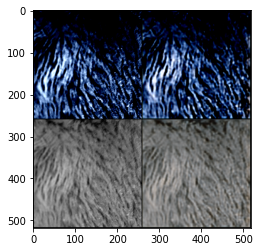

MS-SSIM loss: 0.035 | MSE: 3842.724 | perceptual loss: 1287217.500 | bpp: 13.290 |  PSNR: 30.007


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


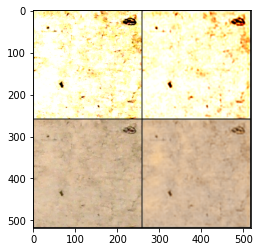

MS-SSIM loss: 0.128 | MSE: 2787.496 | perceptual loss: 1386363.500 | bpp: 12.100 |  PSNR: 31.399


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


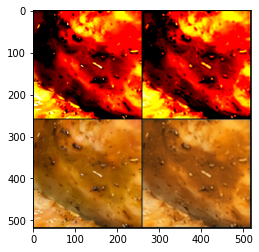

MS-SSIM loss: 0.108 | MSE: 7596.248 | perceptual loss: 1508704.625 | bpp: 18.137 |  PSNR: 27.048


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


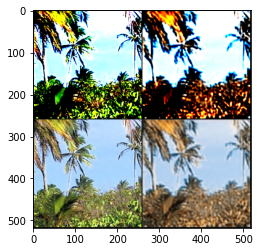

MS-SSIM loss: 0.132 | MSE: 39691.117 | perceptual loss: 2625755.250 | bpp: 4.164 |  PSNR: 19.868


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


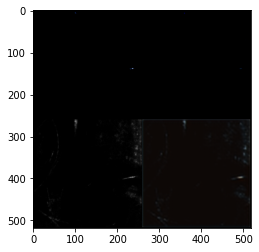

MS-SSIM loss: 0.097 | MSE: 7406.987 | perceptual loss: 1580181.000 | bpp: 23.440 |  PSNR: 27.128


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


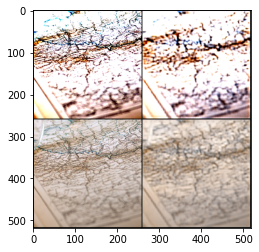

MS-SSIM loss: 0.105 | MSE: 24243.195 | perceptual loss: 2104761.500 | bpp: 4.280 |  PSNR: 22.005


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


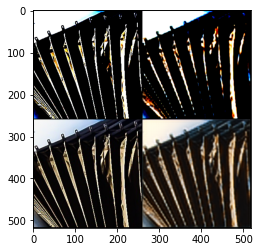

MS-SSIM loss: 0.116 | MSE: 88056.945 | perceptual loss: 3447665.000 | bpp: 4.789 |  PSNR: 16.401


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


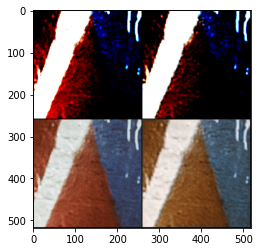

MS-SSIM loss: 0.120 | MSE: 8653.853 | perceptual loss: 1705438.000 | bpp: 3.986 |  PSNR: 26.480


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


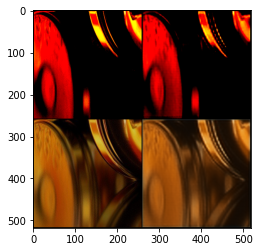

MS-SSIM loss: 0.145 | MSE: 9949.566 | perceptual loss: 1659641.750 | bpp: 16.810 |  PSNR: 25.859


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


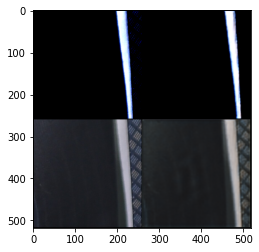

MS-SSIM loss: 0.120 | MSE: 3016.759 | perceptual loss: 823371.625 | bpp: 3.959 |  PSNR: 31.070


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


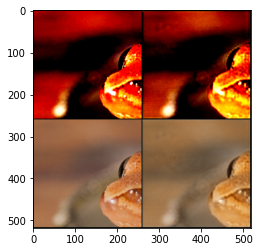

MS-SSIM loss: 0.089 | MSE: 3466.393 | perceptual loss: 876444.938 | bpp: 1.140 |  PSNR: 30.473


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


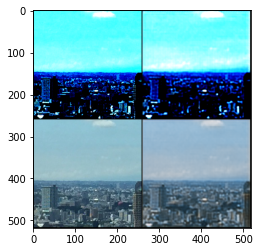

MS-SSIM loss: 0.095 | MSE: 8512.340 | perceptual loss: 1344428.000 | bpp: 1.862 |  PSNR: 26.549


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


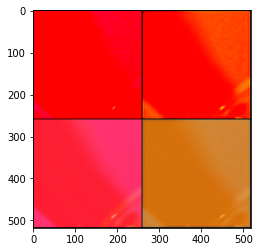

MS-SSIM loss: 0.262 | MSE: 209724.516 | perceptual loss: 1332228.500 | bpp: 5.621 |  PSNR: 12.671


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


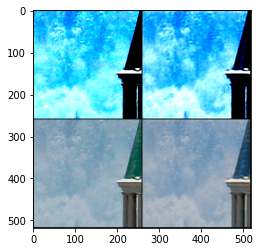

MS-SSIM loss: 0.100 | MSE: 4222.713 | perceptual loss: 1098002.875 | bpp: 3.449 |  PSNR: 29.598


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


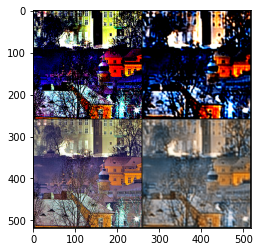

MS-SSIM loss: 0.214 | MSE: 74029.594 | perceptual loss: 3762533.250 | bpp: 1.185 |  PSNR: 17.160


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


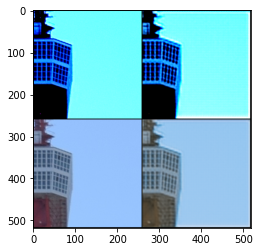

MS-SSIM loss: 0.119 | MSE: 7847.806 | perceptual loss: 1104706.375 | bpp: 2.374 |  PSNR: 26.918


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


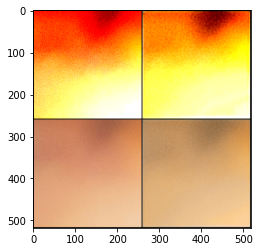

MS-SSIM loss: 0.190 | MSE: 6211.808 | perceptual loss: 979993.188 | bpp: 7.689 |  PSNR: 27.935


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


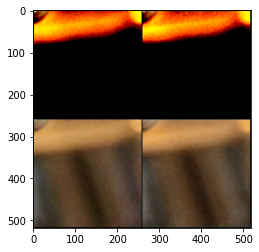

MS-SSIM loss: 0.066 | MSE: 1287.836 | perceptual loss: 878212.062 | bpp: 5.036 |  PSNR: 34.754


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


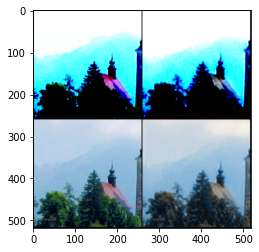

MS-SSIM loss: 0.139 | MSE: 8852.939 | perceptual loss: 1549677.500 | bpp: 3.637 |  PSNR: 26.376


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


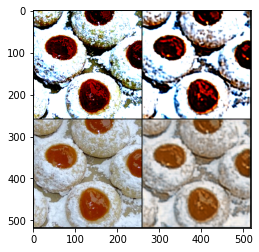

MS-SSIM loss: 0.100 | MSE: 17099.725 | perceptual loss: 2490775.500 | bpp: 6.763 |  PSNR: 23.510


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


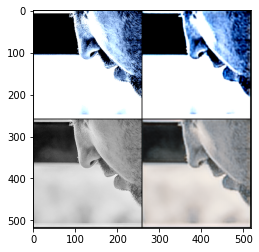

MS-SSIM loss: 0.066 | MSE: 8447.759 | perceptual loss: 1268399.125 | bpp: 2.908 |  PSNR: 26.569


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


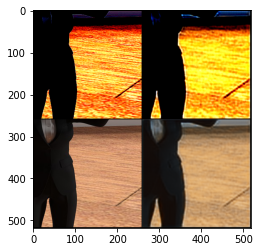

MS-SSIM loss: 0.151 | MSE: 10426.576 | perceptual loss: 1858789.750 | bpp: 18.099 |  PSNR: 25.665


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


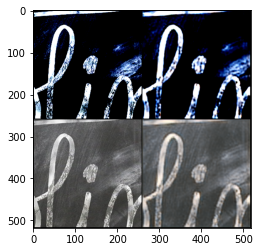

MS-SSIM loss: 0.086 | MSE: 11814.014 | perceptual loss: 1734846.000 | bpp: 3.339 |  PSNR: 25.130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


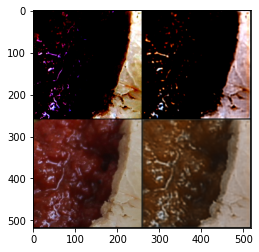

MS-SSIM loss: 0.082 | MSE: 10103.998 | perceptual loss: 1595963.000 | bpp: 20.666 |  PSNR: 25.820


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


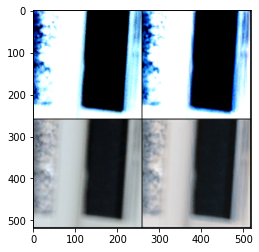

MS-SSIM loss: 0.067 | MSE: 3353.981 | perceptual loss: 1099162.500 | bpp: 2.292 |  PSNR: 30.563


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


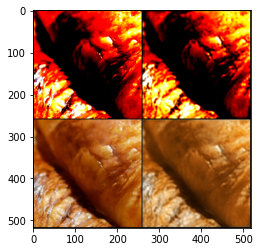

MS-SSIM loss: 0.107 | MSE: 10845.836 | perceptual loss: 1796146.125 | bpp: 10.856 |  PSNR: 25.512


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


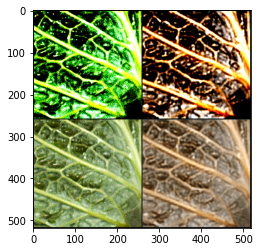

MS-SSIM loss: 0.145 | MSE: 38160.641 | perceptual loss: 2604871.750 | bpp: 3.029 |  PSNR: 20.051


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


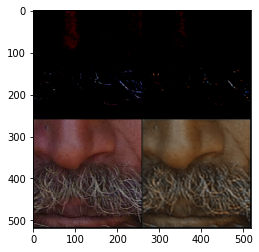

MS-SSIM loss: 0.097 | MSE: 10370.145 | perceptual loss: 1786197.875 | bpp: 14.765 |  PSNR: 25.712


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


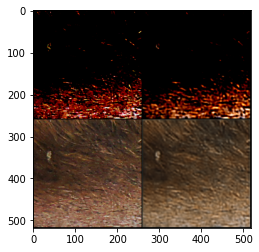

MS-SSIM loss: 0.119 | MSE: 7257.126 | perceptual loss: 1958717.250 | bpp: 14.169 |  PSNR: 27.244


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


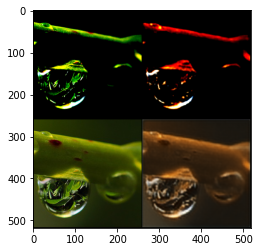

MS-SSIM loss: 0.164 | MSE: 24563.781 | perceptual loss: 1548627.375 | bpp: 2.603 |  PSNR: 21.977


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


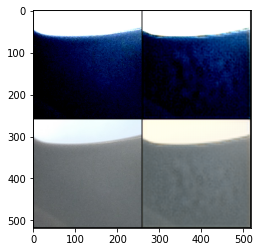

MS-SSIM loss: 0.303 | MSE: 6023.370 | perceptual loss: 1004633.812 | bpp: 0.695 |  PSNR: 28.022


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


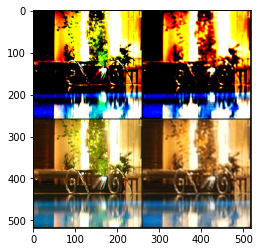

MS-SSIM loss: 0.131 | MSE: 27676.359 | perceptual loss: 2519572.250 | bpp: 12.849 |  PSNR: 21.429


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


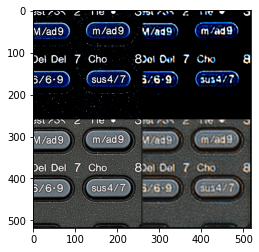

MS-SSIM loss: 0.190 | MSE: 53315.207 | perceptual loss: 2818335.250 | bpp: 5.233 |  PSNR: 18.584


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


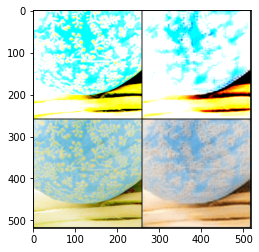

MS-SSIM loss: 0.331 | MSE: 22283.422 | perceptual loss: 2246292.000 | bpp: 7.723 |  PSNR: 22.369


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


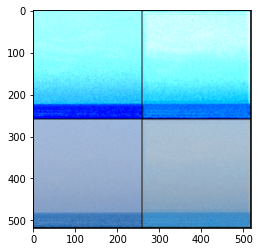

MS-SSIM loss: 0.147 | MSE: 4629.894 | perceptual loss: 728093.562 | bpp: 47.578 |  PSNR: 29.217


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


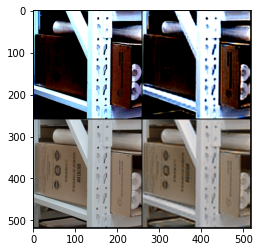

MS-SSIM loss: 0.084 | MSE: 8908.573 | perceptual loss: 1784606.625 | bpp: 5.318 |  PSNR: 26.348


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


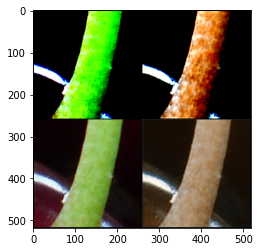

MS-SSIM loss: 0.221 | MSE: 26485.199 | perceptual loss: 1520371.000 | bpp: 1.662 |  PSNR: 21.646


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


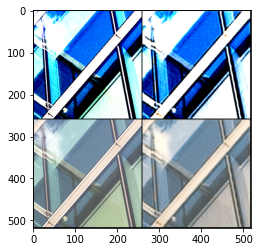

MS-SSIM loss: 0.117 | MSE: 17681.176 | perceptual loss: 1971557.000 | bpp: 2.757 |  PSNR: 23.378


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


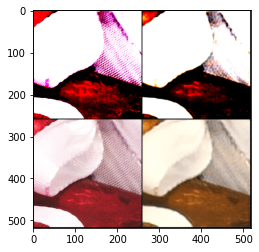

MS-SSIM loss: 0.222 | MSE: 24521.488 | perceptual loss: 1889708.625 | bpp: 2.954 |  PSNR: 21.980


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


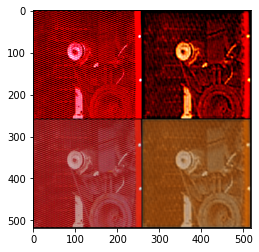

MS-SSIM loss: 0.410 | MSE: 62853.039 | perceptual loss: 3059910.000 | bpp: 11.570 |  PSNR: 17.889


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


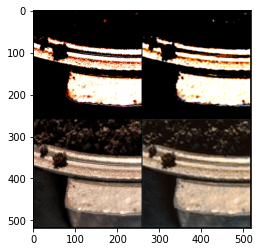

MS-SSIM loss: 0.081 | MSE: 10427.061 | perceptual loss: 1984884.750 | bpp: 6.310 |  PSNR: 25.662


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


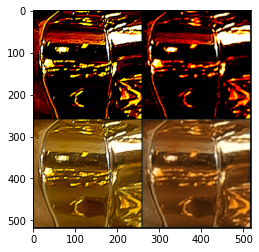

MS-SSIM loss: 0.176 | MSE: 35696.535 | perceptual loss: 2707971.500 | bpp: 7.819 |  PSNR: 20.321


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


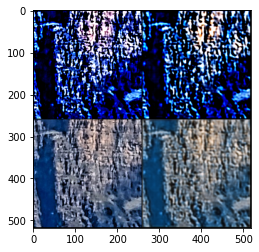

MS-SSIM loss: 0.073 | MSE: 25104.824 | perceptual loss: 2251172.750 | bpp: 15.988 |  PSNR: 21.857


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


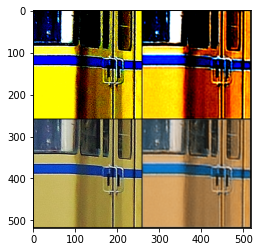

MS-SSIM loss: 0.188 | MSE: 35683.520 | perceptual loss: 2161560.250 | bpp: 20.699 |  PSNR: 20.332


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


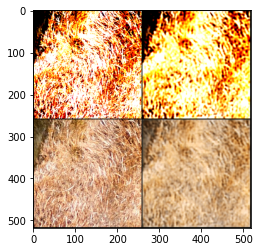

MS-SSIM loss: 0.161 | MSE: 38321.527 | perceptual loss: 2912485.750 | bpp: 16.356 |  PSNR: 20.027


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


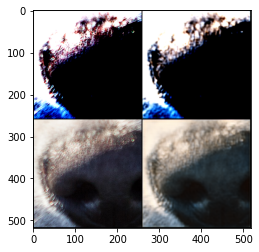

MS-SSIM loss: 0.087 | MSE: 5976.174 | perceptual loss: 1622732.000 | bpp: 1.752 |  PSNR: 28.089


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


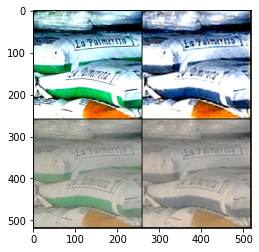

MS-SSIM loss: 0.091 | MSE: 5930.464 | perceptual loss: 1371233.500 | bpp: 17.801 |  PSNR: 28.119


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


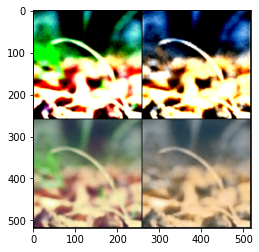

MS-SSIM loss: 0.105 | MSE: 11187.142 | perceptual loss: 1352104.000 | bpp: 1.787 |  PSNR: 25.403


In [4]:
msssim_total, mse_total, perceptual_total, bpp_total, PSNR_total = finetune(jpeg_ai, encoder, importance, decoder, probabilityModel, 
                                                           device, L1_loss, MSE_loss,
                                                           vgg16, round_straightthrough, dec_bias, d1, d2, d3)

In [5]:
print('='*80)
print('msssim: {:.3f} | mse: {:.3f} | perceptual: {:.3f} | bpp: {:.3f} | PSNR: {:.3f}'.format(
      msssim_total.tolist()/50, mse_total.tolist()/50, perceptual_total.tolist()/50, bpp_total.tolist()/50, PSNR_total/50))

msssim: 0.138 | mse: 22538.275 | perceptual: 1802336.160 | bpp: 8.910 | PSNR: 24.714
